# Actividad 3 (MEDA) + Actividad 2 (REMS): superposición por estaciones (Jezero vs Gale)

Este notebook genera **4 gráficas (una por estación)** donde se superponen:
- **Jezero (Perseverance / MEDA)** vs **Gale (Curiosity / REMS)**  
- usando **presión promediada cada 5 minutos** en función de **LMST (0–24 h)**.

> Nota: aquí uso las estaciones tal como se definieron en cada práctica:
- **Gale / REMS (hemisferio sur)**: Sol 53 (Primavera), 196 (Verano), 350 (Otoño), 1212 (Invierno)
- **Jezero / MEDA (hemisferio norte)**: Sol 658 (Primavera), 182 (Verano), 361 (Otoño), 504 (Invierno)

---

## 0) Preparación

1. Los siguientes archivos deben encontrarse en la misma carpeta que esta notebook:
   - MEDA: `WE__0182___________DER_PS__________________P01.csv`, `WE__0361___________DER_PS__________________P01.csv`, `WE__0504___________DER_PS__________________P01.csv`, `WE__0658___________DER_PS__________________P01.csv`
   - REMS: `SOL53.TAB`, `SOL196.TAB`, `SOL350.TAB`, `SOL1212.TAB`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 80)
pd.set_option("display.width", 160)

# =========================
# Archivos MEDA (Jezero)
# =========================
meda_files = {
    182: "WE__0182___________DER_PS__________________P01.csv",  # Verano
    361: "WE__0361___________DER_PS__________________P01.csv",  # Otoño
    504: "WE__0504___________DER_PS__________________P01.csv",  # Invierno
    658: "WE__0658___________DER_PS__________________P01.csv",  # Primavera
}

# =========================
# Archivos REMS (Gale)
# =========================
rems_files = {
    53:   "SOL53.TAB",    # Primavera
    196:  "SOL196.TAB",   # Verano
    350:  "SOL350.TAB",   # Otoño
    1212: "SOL1212.TAB",  # Invierno
}

# =========================
# Lectura MEDA (CSV)
# =========================
meda_raw = []

print("=== MEDA (CSV) ===")
for sol, fname in meda_files.items():
    df = pd.read_csv(fname)
    df["SOL"] = sol
    meda_raw.append(df)
    print(f"Sol {sol} -> shape {df.shape}")

meda_raw = pd.concat(meda_raw, ignore_index=True)

print("\nMEDA total shape:", meda_raw.shape)
print("\nMEDA columns:")
print(meda_raw.columns)
meda_raw.head()



=== MEDA (CSV) ===
Sol 182 -> shape (24093, 7)
Sol 361 -> shape (67344, 7)
Sol 504 -> shape (37716, 7)
Sol 658 -> shape (71831, 7)

MEDA total shape: (200984, 7)

MEDA columns:
Index(['SCLK', 'LMST', 'LTST', 'PRESSURE', 'PRESSURE_UNCERTAINTY', 'TRANSDUCER', 'SOL'], dtype='object')


,SCLK,LMST,LTST,PRESSURE,PRESSURE_UNCERTAINTY,TRANSDUCER,SOL
0,683051134,00182M00:00:00.924,0182 00:14:47,713.48,NaN,1,182
1,683051135,00182M00:00:01.897,0182 00:14:48,713.55,NaN,1,182
2,683051136,00182M00:00:02.871,0182 00:14:48,713.57,NaN,1,182
3,683051137,00182M00:00:03.844,0182 00:14:49,713.53,NaN,1,182
4,683051138,00182M00:00:04.817,0182 00:14:50,713.53,NaN,1,182


In [2]:
# =========================
# Lectura REMS (TAB)
# =========================
rems_raw = []

print("=== REMS (TAB) ===")
for sol, fname in rems_files.items():
    df = pd.read_fwf(fname, header=None)
    df["SOL"] = sol
    rems_raw.append(df)
    print(f"Sol {sol} -> shape {df.shape}")

rems_raw = pd.concat(rems_raw, ignore_index=True)

print("\nREMS total shape:", rems_raw.shape)
print("\nNúmero de columnas REMS:", rems_raw.shape[1])
rems_raw.head()


=== REMS (TAB) ===
Sol 53 -> shape (20153, 37)
Sol 196 -> shape (25887, 37)
Sol 350 -> shape (31129, 37)
Sol 1212 -> shape (41256, 37)

REMS total shape: (118425, 37)

Número de columnas REMS: 37


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,SOL
0,"402151514,""00053M00:00:00.940"",""00053","00:39:36"",","UNK,","UNK,","UNK,""","UNK"",","UNK,","UNK,","UNK,""","UNK"",","215.12,""111XX111"",","212.81,""111XX111"",","212.81,""","111XX1111"",","0.00,","0.00,","0.00,","0.00,","0.00,","0.00,","10.00,","10.00,","10.00,","10.00,","10.00,","10.00,""","01111"",","UNK,","UNK,","UNK,","UNK,","UNK,""","UNK"",""2H"",","778.35,","2.70,""","11""",53
1,"402151515,""00053M00:00:01.913"",""00053","00:39:37"",","UNK,","UNK,","UNK,""","UNK"",","UNK,","UNK,","UNK,""","UNK"",","215.11,""111XX111"",","212.84,""111XX111"",","212.84,""","111XX1111"",","0.00,","0.00,","0.00,","0.00,","0.00,","0.00,","10.00,","10.00,","10.00,","10.00,","10.00,","10.00,""","01111"",","4.36,","215.03,","10.00,","77.88,","NULL,""","0X1"",""2H"",","778.34,","2.70,""","11""",53
2,"402151516,""00053M00:00:02.887"",""00053","00:39:38"",","UNK,","UNK,","UNK,""","UNK"",","UNK,","UNK,","UNK,""","UNK"",","215.11,""111XX111"",","212.88,""111XX111"",","212.88,""","111XX1111"",","0.00,","0.00,","0.00,","0.00,","0.00,","0.00,","10.00,","10.00,","10.00,","10.00,","10.00,","10.00,""","01111"",","4.41,","215.02,","10.00,","78.73,","NULL,""","0X1"",""2H"",","778.36,","2.70,""","11""",53
3,"402151517,""00053M00:00:03.860"",""00053","00:39:39"",","UNK,","UNK,","UNK,""","UNK"",","UNK,","UNK,","UNK,""","UNK"",","215.10,""111XX111"",","212.91,""111XX111"",","212.91,""","111XX1111"",","0.00,","0.00,","0.00,","0.00,","0.00,","0.00,","10.00,","10.00,","10.00,","10.00,","10.00,","10.00,""","01111"",","4.39,","215.03,","10.00,","78.31,","NULL,""","0X1"",""2H"",","778.40,","2.70,""","11""",53
4,"402151518,""00053M00:00:04.833"",""00053","00:39:40"",","UNK,","UNK,","UNK,""","UNK"",","UNK,","UNK,","UNK,""","UNK"",","215.10,""111XX111"",","212.93,""111XX111"",","212.93,""","111XX1111"",","0.00,","0.00,","0.00,","0.00,","0.00,","0.00,","10.00,","10.00,","10.00,","10.00,","10.00,","10.00,""","01111"",","4.40,","215.03,","10.00,","78.64,","NULL,""","0X1"",""2H"",","778.42,","2.70,""","11""",53


In [3]:
import re

df = rems_raw.copy()

# ---------- detectar LMST ----------
lmst_scores = []
for c in df.columns[:-1]:  # excluimos SOL
    s = df[c].astype(str)
    score = s.str.contains(r"M\d{2}:\d{2}:\d{2}", regex=True).mean()
    lmst_scores.append((c, score))

lmst_scores = sorted(lmst_scores, key=lambda x: x[1], reverse=True)

print("Top columnas LMST (col, score):")
for x in lmst_scores[:5]:
    print(x)

LMST_IDX = lmst_scores[0][0]
print("\n👉 LMST_IDX elegido:", LMST_IDX)


# ---------- detectar PRESIÓN ----------
pressure_scores = []
for c in df.columns[:-1]:
    x = pd.to_numeric(df[c], errors="coerce")
    valid = x.notna().mean()
    in_range = ((x >= 600) & (x <= 900)).mean()
    pressure_scores.append((c, valid, in_range))

pressure_scores = sorted(pressure_scores, key=lambda x: (x[2], x[1]), reverse=True)

print("\nTop columnas PRESIÓN (col, valid%, in_range%):")
for x in pressure_scores[:8]:
    print(x)

PRESS_IDX = pressure_scores[0][0]
print("\n👉 PRESS_IDX elegido:", PRESS_IDX)


# ---------- preview de las columnas elegidas ----------
preview = df[[LMST_IDX, PRESS_IDX, "SOL"]].head(10)
preview.columns = ["LMST_RAW", "PRESSURE_RAW", "SOL"]
preview


Top columnas LMST (col, score):
(0, np.float64(1.0))
(1, np.float64(0.0))
(2, np.float64(0.0))
(3, np.float64(0.0))
(4, np.float64(0.0))

👉 LMST_IDX elegido: 0

Top columnas PRESIÓN (col, valid%, in_range%):
(0, np.float64(0.0), np.float64(0.0))
(1, np.float64(0.0), np.float64(0.0))
(2, np.float64(0.0), np.float64(0.0))
(3, np.float64(0.0), np.float64(0.0))
(4, np.float64(0.0), np.float64(0.0))
(5, np.float64(0.0), np.float64(0.0))
(6, np.float64(0.0), np.float64(0.0))
(7, np.float64(0.0), np.float64(0.0))

👉 PRESS_IDX elegido: 0


,LMST_RAW,PRESSURE_RAW,SOL
0,"402151514,""00053M00:00:00.940"",""00053","402151514,""00053M00:00:00.940"",""00053",53
1,"402151515,""00053M00:00:01.913"",""00053","402151515,""00053M00:00:01.913"",""00053",53
2,"402151516,""00053M00:00:02.887"",""00053","402151516,""00053M00:00:02.887"",""00053",53
3,"402151517,""00053M00:00:03.860"",""00053","402151517,""00053M00:00:03.860"",""00053",53
4,"402151518,""00053M00:00:04.833"",""00053","402151518,""00053M00:00:04.833"",""00053",53
5,"402151519,""00053M00:00:05.806"",""00053","402151519,""00053M00:00:05.806"",""00053",53
6,"402151520,""00053M00:00:06.780"",""00053","402151520,""00053M00:00:06.780"",""00053",53
7,"402151521,""00053M00:00:07.753"",""00053","402151521,""00053M00:00:07.753"",""00053",53
8,"402151522,""00053M00:00:08.726"",""00053","402151522,""00053M00:00:08.726"",""00053",53
9,"402151523,""00053M00:00:09.699"",""00053","402151523,""00053M00:00:09.699"",""00053",53


In [4]:
# Columnas confirmadas por vos
LMST_IDX = 1
PRESS_IDX = 33

rems_sel = rems_raw[[LMST_IDX, PRESS_IDX, "SOL"]].copy()
rems_sel.columns = ["LMST_RAW", "PRESSURE_RAW", "SOL"]

# Limpiar strings raros (comillas, comas)
rems_sel["LMST_RAW"] = rems_sel["LMST_RAW"].astype(str).str.replace('"', "", regex=False).str.strip()
rems_sel["PRESSURE_RAW"] = rems_sel["PRESSURE_RAW"].astype(str).str.replace('"', "", regex=False).str.replace(",", "", regex=False).str.strip()

# Convertir a número
rems_sel["PRESSURE"] = pd.to_numeric(rems_sel["PRESSURE_RAW"], errors="coerce")

print("REMS seleccionado shape:", rems_sel.shape)
print("\nREMS pressure describe:")
print(rems_sel["PRESSURE"].describe())

rems_sel.head(10)


REMS seleccionado shape: (118425, 4)

REMS pressure describe:
count    118425.000000
mean        850.017208
std          52.059693
min         716.080000
25%         823.660000
50%         859.980000
75%         874.910000
max         957.370000
Name: PRESSURE, dtype: float64


,LMST_RAW,PRESSURE_RAW,SOL,PRESSURE
0,"00:39:36,",778.35,53,778.35
1,"00:39:37,",778.34,53,778.34
2,"00:39:38,",778.36,53,778.36
3,"00:39:39,",778.40,53,778.40
4,"00:39:40,",778.42,53,778.42
5,"00:39:41,",778.41,53,778.41
6,"00:39:42,",778.50,53,778.50
7,"00:39:43,",778.44,53,778.44
8,"00:39:44,",778.48,53,778.48
9,"00:39:45,",778.46,53,778.46


In [5]:
def hhmmss_to_hours_clean(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()

    # sacar coma final si existe
    if s.endswith(","):
        s = s[:-1].strip()

    # ahora debería ser HH:MM:SS o HH:MM:SS.sss
    try:
        h, m, sec = s.split(":")
        return int(h) + int(m)/60 + float(sec)/3600
    except Exception:
        return np.nan

rems_sel["LMST_H"] = rems_sel["LMST_RAW"].apply(hhmmss_to_hours_clean)

print("NaN ratio LMST_H:", rems_sel["LMST_H"].isna().mean())
print("\nLMST_H describe:")
print(rems_sel["LMST_H"].describe())

rems_sel[["SOL","LMST_RAW","LMST_H","PRESSURE"]].head(10)


NaN ratio LMST_H: 0.0

LMST_H describe:
count    118425.000000
mean         11.607035
std           6.120692
min           0.000000
25%           7.161389
50%          11.260556
75%          16.518889
max          23.999722
Name: LMST_H, dtype: float64


,SOL,LMST_RAW,LMST_H,PRESSURE
0,53,"00:39:36,",0.660000,778.35
1,53,"00:39:37,",0.660278,778.34
2,53,"00:39:38,",0.660556,778.36
3,53,"00:39:39,",0.660833,778.40
4,53,"00:39:40,",0.661111,778.42
5,53,"00:39:41,",0.661389,778.41
6,53,"00:39:42,",0.661667,778.50
7,53,"00:39:43,",0.661944,778.44
8,53,"00:39:44,",0.662222,778.48
9,53,"00:39:45,",0.662500,778.46


In [6]:
# --- Binning REMS cada 5 min (0.08333 h) ---
STEP_H = 5 / 60
grid = np.arange(0, 24, STEP_H)

def bin_5min_rems(df_sol: pd.DataFrame, sol: int) -> pd.DataFrame:
    rows = []
    for t0 in grid:
        t1 = t0 + STEP_H
        w = df_sol[(df_sol["LMST_H"] >= t0) & (df_sol["LMST_H"] < t1)]
        if len(w) == 0:
            rows.append({
                "SOL": sol,
                "LMST": t0,
                "PRESSURE_MEAN": np.nan,
                "N": 0
            })
        else:
            rows.append({
                "SOL": sol,
                "LMST": t0,
                "PRESSURE_MEAN": float(np.nanmean(w["PRESSURE"])),
                "N": int(len(w))
            })
    return pd.DataFrame(rows)

rems_5min = pd.concat(
    [bin_5min_rems(rems_sel[rems_sel["SOL"] == sol].copy(), sol)
     for sol in sorted(rems_sel["SOL"].unique())],
    ignore_index=True
)

print("REMS 5min shape:", rems_5min.shape)
rems_5min.groupby("SOL")[["N"]].agg(["min", "max", "mean"])


REMS 5min shape: (1152, 4)


N                 
     min  max        mean
SOL                      
53     0  293   69.975694
196    0  309   89.885417
350    0  309  108.086806
1212   0  309  143.250000

In [12]:
# --- MEDA: convertir LMST ("00182MHH:MM:SS.sss") a horas decimales 0-24 ---

def meda_lmst_to_hours(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()

    # esperamos algo como: 00182M00:00:00.924
    if "M" not in s:
        return np.nan

    hhmmss = s.split("M", 1)[1]  # "00:00:00.924"
    try:
        h, m, sec = hhmmss.split(":")
        return int(h) + int(m)/60 + float(sec)/3600
    except Exception:
        return np.nan

# crear columna LMST_H
meda_raw["LMST_H"] = meda_raw["LMST"].apply(meda_lmst_to_hours)

print("NaN ratio LMST_H (MEDA):", meda_raw["LMST_H"].isna().mean())
print("\nLMST_H describe (MEDA):")
print(meda_raw["LMST_H"].describe())

meda_raw[["SOL", "LMST", "LMST_H", "PRESSURE"]].head(10)


NaN ratio LMST_H (MEDA): 0.0

LMST_H describe (MEDA):
count    200984.000000
mean         11.432686
std           7.106377
min           0.000147
25%           4.901659
50%          11.468349
75%          17.493331
max          23.999999
Name: LMST_H, dtype: float64


,SOL,LMST,LMST_H,PRESSURE
0,182,00182M00:00:00.924,0.000257,713.48
1,182,00182M00:00:01.897,0.000527,713.55
2,182,00182M00:00:02.871,0.000798,713.57
3,182,00182M00:00:03.844,0.001068,713.53
4,182,00182M00:00:04.817,0.001338,713.53
5,182,00182M00:00:05.790,0.001608,713.57
6,182,00182M00:00:06.764,0.001879,713.59
7,182,00182M00:00:07.737,0.002149,713.55
8,182,00182M00:00:08.710,0.002419,713.53
9,182,00182M00:00:09.683,0.002690,713.55


In [16]:
# --- MEDA: promediado cada 5 min (0.083333 h) ---

STEP_H = 5 / 60  # 5 minutos en horas
grid = np.arange(0, 24, STEP_H)

def meda_bin_5min(df_sol: pd.DataFrame, sol: int) -> pd.DataFrame:
    rows = []
    for t0 in grid:
        t1 = t0 + STEP_H
        w = df_sol[(df_sol["LMST_H"] >= t0) & (df_sol["LMST_H"] < t1)]

        if len(w) == 0:
            rows.append({
                "SOL": sol,
                "LMST": t0,
                "PRESSURE_MEAN": np.nan,
                "N": 0
            })
        else:
            rows.append({
                "SOL": sol,
                "LMST": t0,
                "PRESSURE_MEAN": float(np.nanmean(w["PRESSURE"])),
                "N": int(len(w))
            })
    return pd.DataFrame(rows)

meda_5min = pd.concat(
    [
        meda_bin_5min(meda_raw[meda_raw["SOL"] == sol], sol)
        for sol in sorted(meda_raw["SOL"].unique())
    ],
    ignore_index=True
)

print("MEDA 5min shape:", meda_5min.shape)
print("\nConteo de puntos por SOL (N):")
print(meda_5min.groupby("SOL")["N"].agg(["min", "max", "mean"]))

meda_5min.head(10)


MEDA 5min shape: (1152, 4)

Conteo de puntos por SOL (N):
     min  max        mean
SOL                      
182    0  309   83.656250
361    0  309  233.833333
504    0  309  130.958333
658    0  309  249.413194


,SOL,LMST,PRESSURE_MEAN,N
0,182,0.000000,713.431591,308
1,182,0.083333,713.215909,308
2,182,0.166667,713.029675,308
3,182,0.250000,712.912395,309
4,182,0.333333,712.828929,308
5,182,0.416667,712.643214,308
6,182,0.500000,712.430519,308
7,182,0.583333,712.331197,309
8,182,0.666667,712.123149,308
9,182,0.750000,711.927532,308


In [18]:
# --- Mapeo estacional Gale (REMS) vs Jezero (MEDA) ---

season_map = pd.DataFrame({
    "ESTACION":   ["Verano", "Otoño", "Invierno", "Primavera"],
    "SOL_JEZERO": [182, 361, 504, 658],   # MEDA (Perseverance)
    "SOL_GALE":   [196, 350, 1212, 53]    # REMS (Curiosity)
})

season_map


,ESTACION,SOL_JEZERO,SOL_GALE
0,Verano,182,196
1,Otoño,361,350
2,Invierno,504,1212
3,Primavera,658,53


In [19]:
print("¿Existe rems_5min?", "rems_5min" in globals())

print("\nREMS 5min shape:", rems_5min.shape)
print("\nREMS 5min columns:", rems_5min.columns.tolist())

print("\nConteo de puntos por SOL (N):")
print(rems_5min.groupby("SOL")["N"].agg(["min","max","mean"]))

rems_5min.head(10)


¿Existe rems_5min? True

REMS 5min shape: (1152, 4)

REMS 5min columns: ['SOL', 'LMST', 'PRESSURE_MEAN', 'N']

Conteo de puntos por SOL (N):
      min  max        mean
SOL                       
53      0  293   69.975694
196     0  309   89.885417
350     0  309  108.086806
1212    0  309  143.250000


,SOL,LMST,PRESSURE_MEAN,N
0,53,0.000000,NaN,0
1,53,0.083333,NaN,0
2,53,0.166667,NaN,0
3,53,0.250000,NaN,0
4,53,0.333333,NaN,0
5,53,0.416667,NaN,0
6,53,0.500000,NaN,0
7,53,0.583333,778.426400,25
8,53,0.666667,778.530494,263
9,53,0.750000,778.835247,263


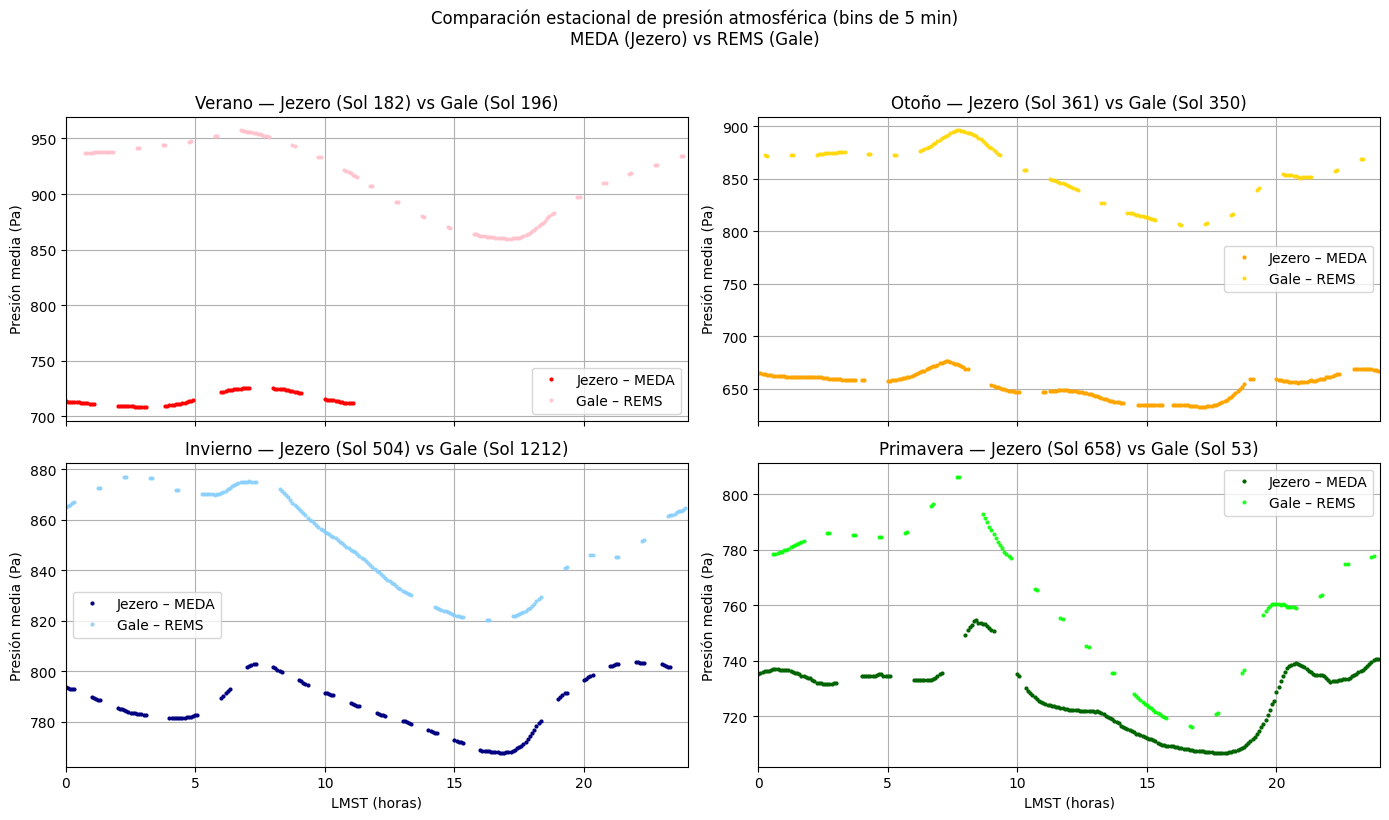

In [28]:
# --- Plot: superposición estacional (solo puntos, colores diferenciados) ---

season_colors = {
    "Verano":    {"MEDA": "red",        "REMS": "pink"},
    "Otoño":     {"MEDA": "orange",     "REMS": "gold"},
    "Invierno":  {"MEDA": "navy",       "REMS": "lightskyblue"},
    "Primavera": {"MEDA": "darkgreen",  "REMS": "lime"}
}

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.ravel()

for i, row in season_map.iterrows():
    est = row["ESTACION"]
    solJ = row["SOL_JEZERO"]
    solG = row["SOL_GALE"]

    cJ = season_colors[est]["MEDA"]
    cG = season_colors[est]["REMS"]

    # MEDA (Jezero)
    dJ = meda_5min[(meda_5min["SOL"] == solJ) & (meda_5min["N"] > 0)]
    # REMS (Gale)
    dG = rems_5min[(rems_5min["SOL"] == solG) & (rems_5min["N"] > 0)]

    ax = axes[i]
    ax.set_title(f"{est} — Jezero (Sol {solJ}) vs Gale (Sol {solG})")
    ax.grid(True)

    # MEDA → puntos color oscuro
    ax.plot(
        dJ["LMST"], dJ["PRESSURE_MEAN"],
        ".", color=cJ, markersize=4,
        label="Jezero – MEDA"
    )

    # REMS → puntos color claro
    ax.plot(
        dG["LMST"], dG["PRESSURE_MEAN"],
        ".", color=cG, markersize=4,
        alpha=0.8,
        label="Gale – REMS"
    )

    ax.set_ylabel("Presión media (Pa)")
    ax.legend()

axes[2].set_xlabel("LMST (horas)")
axes[3].set_xlabel("LMST (horas)")
plt.xlim(0, 24)

plt.suptitle(
    "Comparación estacional de presión atmosférica (bins de 5 min)\n"
    "MEDA (Jezero) vs REMS (Gale)",
    y=1.02
)

plt.tight_layout()
plt.show()
